## Day 3

### Projections

- How are locations on the sphere transformed to locations on a plane (image)?
- Projections
- Write a script which creates a projection, wraps it in a WCS object and displays it in wcsaxes.
- Rewrite the script as a function which takes a projection (or projection code) and displays the image 
  and saves it to disk.
- Clean up notebook and get it ready for presentation

In [1]:
from astropy.modeling.models import *
from gwcs import coordinate_frames as cf, WCS as GWCS
from astropy import coordinates as coord
import astropy.units as u
from matplotlib import pyplot as plt
%matplotlib inline

Sofar we found the locations of stars in our HST image in the image Cartesian coordinate system.
We also were able to compute the locations of the same stars on the celestial sphere, in one of the standard celestial coordinate systems. We are going to look now at how to transform from coordinates on a sphere to coordinates on a plane (the image) and back.


The transformation of points on a sphere to plane is called spherical projection. There are many types of spherical projection. HST uses a tangent (called also gnomonic) projection.

The geometry of a tangent projection is shown below using matplotlib calls.

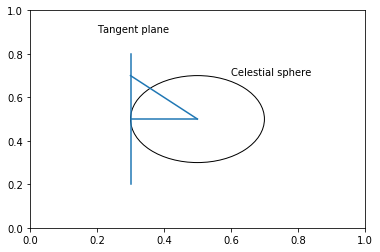

In [5]:
ax = plt.subplot()
circle = plt.Circle((.5, .5), .2, fill=False)
line1 = plt.Line2D([.3, .3], [.2, .8])
line2 = plt.Line2D([.5, .3], [.5, .7])
line3 = plt.Line2D([.5, .3], [.5, .5])
ax.add_patch(circle)
ax.add_line(line1)
ax.add_line(line2)
ax.add_line(line3)
ax.text(.2, .9, "Tangent plane") 
t = ax.text(.6, .7, "Celestial sphere")    

Since the projection is from the center of the sphere, all great circles are
projected as straight lines.

Mathematically the tangent projeciton is defined as 

```
x = sin(lon) / tan(lat)
y = - cos(lon) / tan(lat)
```

You can implement the tangent projection as an exercise using numpy functions.

The most comonly used projection transforms are coded in astropy. We will use the code to create plots of the projections.

In [2]:
bon=Pix2Sky_BON(45)
det=cf.Frame2D(unit=(u.deg, u.deg))
icrs=coord.ICRS()
world=cf.CelestialFrame(reference_frame=icrs)
pipe=[(det, bon), (world, None)]
gw=GWCS(pipe)

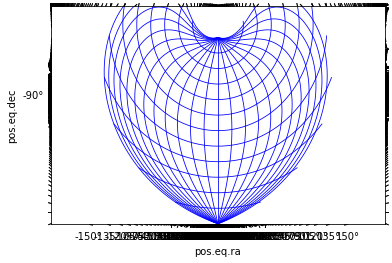

In [3]:
ax=plt.subplot(projection=gw)
ax.grid(color='blue', ls='solid')
ax.coords[0].set_format_unit(u.degree)
ax.coords[0].coord_wrap=180
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 120)
ax.coords[0].set_ticks(spacing=15*u.deg, color='k')
ax.coords[1].set_ticks(spacing=15*u.deg, color='k')

In [4]:
tan=Pix2Sky_TAN()
det=cf.Frame2D(unit=(u.deg, u.deg))
icrs=coord.ICRS()
world=cf.CelestialFrame(reference_frame=icrs)
pipe=[(det, tan), (world, None)]
gw=GWCS(pipe)

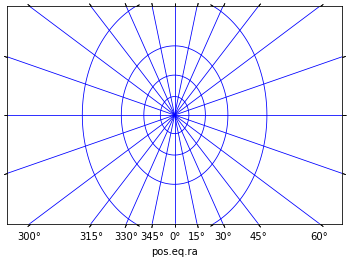

In [5]:
ax=plt.subplot(projection=gw)
ax.grid(color='blue', ls='solid')
ax.coords[0].set_format_unit(u.degree)
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
ax.coords[0].set_ticks(spacing=15*u.deg, color='k')
ax.coords[1].set_ticks(spacing=15*u.deg, color='k')

In [6]:
mol = Pix2Sky_MOL()
det = cf.Frame2D(unit=(u.deg, u.deg))
icrs = coord.ICRS()
world = cf.CelestialFrame(reference_frame=icrs)
pipe = [(det, mol), (world, None)]
gw = GWCS(pipe)

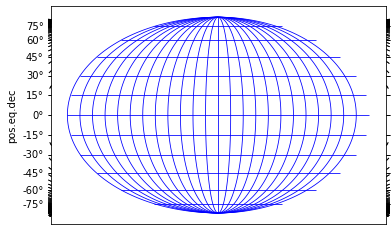

In [7]:
ax = plt.subplot(projection=gw)
ax.grid(color='blue', ls='solid')
ax.coords[0].set_format_unit(u.degree)
ax.coords[0].coord_wrap=180
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
ax.coords[0].set_ticks(spacing=15*u.deg, color='k')
ax.coords[1].set_ticks(spacing=15*u.deg, color='k')

In [ ]:
def create_projection(prj):
    

In [ ]:
def view_projection(projection):
    